In [1]:
##Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

In [5]:
##Load and Explore the Data

In [7]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [9]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [11]:
df.head()

,Feature1,Feature2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [13]:
##Data Preprocessing

In [15]:
print(df.isnull().sum())

Feature1    0
Feature2    0
dtype: int64


In [17]:
scaler = StandardScaler()

In [19]:
scaled_data = scaler.fit_transform(df)

In [21]:
scaled_data

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ],
       [ 2.10861828, -1.43115321],
       [-1.10324303, -0.91549656],
       [ 0.86945278,  0.15961938],
       [-0.12159925,  1.72390048],
       [-0.43150951,  1.81207571],
       [-1.04455722, -0.45953113],
       [-1.63088687,  1.69370116],
       [ 0.7646714 ,  0.2070449 ],
       [-1.36015934,  1.13026612],
       [ 0.89480919, -1.54346749],
       [ 0.28171651, -0.00438029],
       [ 0.65853501,  0.21735249],
       [ 1.57701536, -1.33639314],
       [-0.64935853, -0.32288814],
       [-0.65651282, -0.68090851],
       [ 1.66622125, -1.03373539],
       [ 1.0919422 , -1.07399947],
       [ 0.45350191,  0.41296662],
       [-1.21850803, -0.431015  ],
       [-1.17062784, -0.52619438],
       [-0.33625538,  0.28117366],
       [ 1.04318676, -1.1977347 ],
       [ 0.36802836,  0.28645966],
       [-1.75960686,

In [23]:
##Exploratory Data Analysis

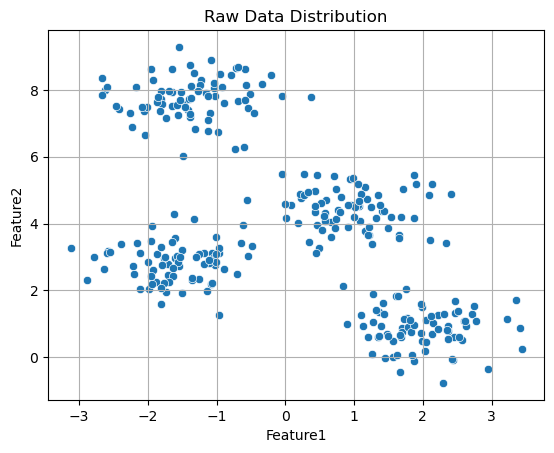

In [25]:
sns.scatterplot(data=df, x='Feature1', y='Feature2')
plt.title("Raw Data Distribution")
plt.grid(True)
plt.show()

In [27]:
##K-Means Clustering

In [29]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

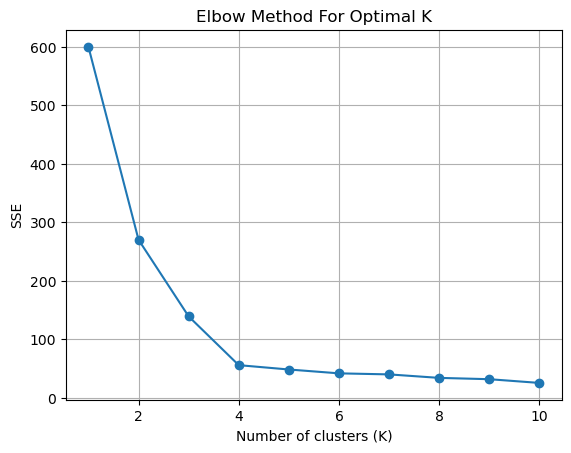

In [31]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [35]:
kmeans

KMeans(n_clusters=4, random_state=0)

In [37]:
labels_kmeans = kmeans.fit_predict(scaled_data)

In [39]:
labels_kmeans

array([2, 3, 0, 3, 2, 2, 1, 0, 3, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 1, 0, 0,
       1, 1, 3, 1, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 3, 2, 3, 0, 3, 1, 1, 1,
       3, 2, 3, 1, 0, 1, 3, 1, 1, 3, 1, 0, 2, 3, 2, 0, 2, 2, 3, 0, 2, 0,
       3, 3, 0, 2, 3, 1, 1, 0, 2, 2, 0, 1, 3, 2, 3, 2, 0, 2, 2, 0, 3, 0,
       1, 1, 2, 3, 2, 0, 3, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 2, 3, 1, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1, 3, 0, 3, 3, 3, 0, 3, 0,
       2, 1, 3, 1, 2, 0, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 3, 2, 0, 1, 3,
       2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 3, 0, 1, 2, 1, 0, 3, 1, 3, 0, 3, 0, 1, 0, 0, 3, 1, 1, 2, 2, 0,
       3, 2, 2, 1, 2, 1, 0, 3, 3, 0, 0, 3, 0, 2, 1, 0, 2, 1, 3, 1, 2, 0,
       2, 3, 3, 3, 3, 1, 1, 3, 0, 1, 2, 0, 1, 1, 1, 2, 2, 3, 0, 0, 1, 2,
       3, 1, 0, 3, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 3, 3, 2, 2, 0, 2, 2, 2,
       3, 1, 3, 0, 2, 2, 3, 3, 3, 2, 2, 0, 3, 1])

In [41]:
df['KMeans_Cluster'] = labels_kmeans

In [43]:
df['KMeans_Cluster'] 

0      2
1      3
2      0
3      3
4      2
      ..
295    2
296    2
297    0
298    3
299    1
Name: KMeans_Cluster, Length: 300, dtype: int32

In [45]:
##Hierarchical Clustering

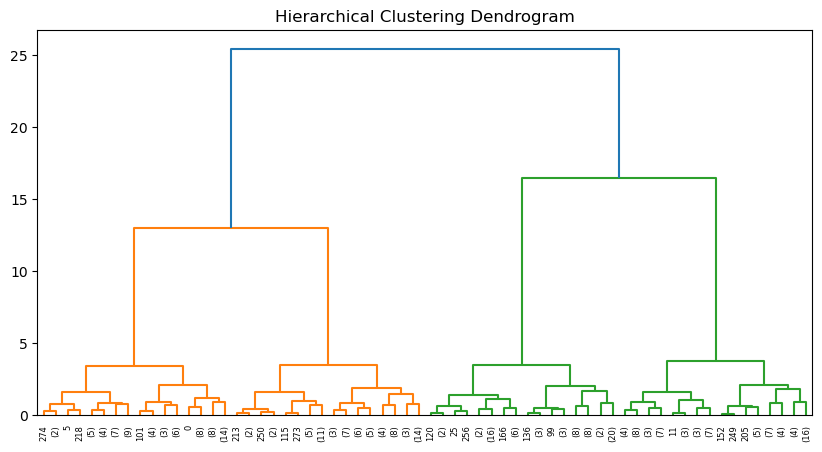

In [47]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [49]:
labels_hier = fcluster(linked, t=4, criterion='maxclust')

In [51]:
labels_hier

array([1, 4, 2, 4, 1, 1, 3, 2, 4, 4, 3, 4, 2, 4, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 3, 1, 2, 3, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 1, 2, 3, 2, 2,
       3, 3, 4, 3, 4, 1, 3, 1, 4, 1, 1, 3, 4, 3, 4, 1, 4, 2, 4, 3, 3, 3,
       4, 1, 4, 3, 2, 3, 4, 3, 3, 4, 3, 2, 1, 4, 1, 2, 1, 1, 4, 2, 1, 2,
       4, 4, 2, 1, 4, 3, 3, 2, 1, 1, 2, 3, 4, 1, 4, 1, 2, 1, 1, 2, 4, 2,
       3, 3, 1, 4, 1, 2, 4, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 4, 3,
       3, 1, 4, 3, 3, 4, 2, 4, 4, 3, 2, 3, 2, 3, 4, 2, 4, 4, 4, 2, 4, 2,
       1, 3, 4, 3, 1, 2, 4, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 4, 1, 2, 3, 4,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 4, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 4, 2, 3, 1, 3, 2, 4, 3, 4, 2, 4, 2, 3, 2, 2, 4, 3, 3, 1, 1, 2,
       4, 1, 1, 3, 1, 3, 2, 4, 4, 2, 2, 4, 2, 1, 3, 2, 1, 3, 4, 3, 1, 2,
       1, 4, 4, 4, 4, 3, 3, 4, 2, 3, 1, 2, 3, 3, 3, 1, 1, 4, 2, 2, 3, 1,
       4, 3, 2, 4, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 4, 4, 1, 1, 2, 1, 1, 1,
       4, 3, 4, 2, 1, 1, 4, 4, 4, 1, 1, 2, 4, 3], d

In [53]:
df['Hierarchical_Cluster'] = labels_hier

In [55]:
df['Hierarchical_Cluster']

0      1
1      4
2      2
3      4
4      1
      ..
295    1
296    1
297    2
298    4
299    3
Name: Hierarchical_Cluster, Length: 300, dtype: int32

In [57]:
##DBSCAN Clustering

In [59]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [61]:
dbscan

DBSCAN()

In [63]:
labels_dbscan = dbscan.fit_predict(scaled_data)


In [65]:
labels_dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [67]:
df['DBSCAN_Cluster'] = labels_dbscan

In [69]:
df['DBSCAN_Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Name: DBSCAN_Cluster, Length: 300, dtype: int64

In [71]:
##Visualization of Clusters

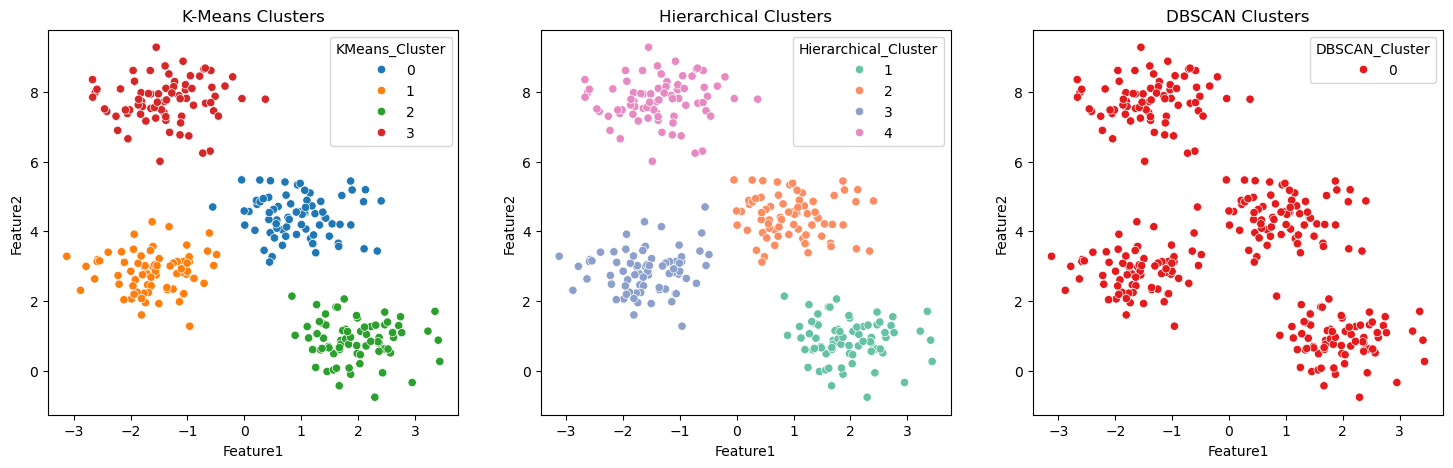

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], data=df, x='Feature1', y='Feature2', hue='KMeans_Cluster', palette='tab10')
axes[0].set_title('K-Means Clusters')

sns.scatterplot(ax=axes[1], data=df, x='Feature1', y='Feature2', hue='Hierarchical_Cluster', palette='Set2')
axes[1].set_title('Hierarchical Clusters')

sns.scatterplot(ax=axes[2], data=df, x='Feature1', y='Feature2', hue='DBSCAN_Cluster', palette='Set1')
axes[2].set_title('DBSCAN Clusters')

plt.show()

In [77]:
##Evaluation Metrics

In [131]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

In [133]:
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

In [135]:
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

In [137]:
df

,Feature1,Feature2
0,6.505653,2.447003
1,-5.128943,9.836189
2,-6.891874,-7.777364
3,-8.327712,-8.287573
4,-7.468992,-6.030507
...,...,...
195,-6.568720,-5.404753
196,-0.623012,9.188864
197,-0.929985,9.781721
198,4.167947,3.062120


In [139]:
kmeans = KMeans(n_clusters=3)

In [141]:
df["KMeans"] = kmeans.fit_predict(df)

C:\Users\sub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [143]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [145]:
df["DBSCAN"] = dbscan.fit_predict(df)

In [147]:
score_kmeans = silhouette_score(df[["Feature1", "Feature2"]], df["KMeans"])

In [149]:
print("KMeans Silhouette Score:", score_kmeans)

KMeans Silhouette Score: 0.8467003894636074


In [151]:
mask = df["DBSCAN"] != -1
if mask.sum() > 1 and len(set(df["DBSCAN"][mask])) > 1:
    score_dbscan = silhouette_score(df[mask][["Feature1", "Feature2"]], df["DBSCAN"][mask])
    print("DBSCAN Silhouette Score:", score_dbscan)
else:
    print("DBSCAN: Not enough clusters to calculate silhouette score")

DBSCAN Silhouette Score: 0.6138815645718531
